## Global Warming

Several years ago, I watched a YouTube video about global warming. The rising temperature of the Earth is evident, but some people may argue that the temperature changes are due to Earth's natural cycle instead of the human activities. The Kaggle website I obtained this data from mentions that there is a difference in global warming vs climate change. In particular, the global warming is the increase in Earth's average surface temperature mainly due to human activies where as climate change is the long-term changes in Earth's climate.

The data represents the Google searches of global warming and climate change. I would like to explore the presented data.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Interest Over Time

In [45]:
df = pd.read_csv('Interest_Over_Time.csv')

In [79]:
df.head()

Month  Climate change: (Worldwide)  Global Warming: (Worldwide)
0  2004-01                           28                           21
1  2004-02                           35                           22
2  2004-03                           34                           21
3  2004-04                           28                           23
4  2004-05                           37                           26

In [94]:
df['sum'] = df['Climate change: (Worldwide)'] + df['Global Warming: (Worldwide)']

In [80]:
import datetime as dt

In [86]:
df.Month = pd.to_datetime(df.Month)

In [90]:
df['year'] = df.Month.dt.year

In [95]:
df.head()

Month  Climate change: (Worldwide)  Global Warming: (Worldwide)  year  \
0 2004-01-01                           28                           21  2004   
1 2004-02-01                           35                           22  2004   
2 2004-03-01                           34                           21  2004   
3 2004-04-01                           28                           23  2004   
4 2004-05-01                           37                           26  2004   

   sum  
0   49  
1   57  
2   55  
3   51  
4   63

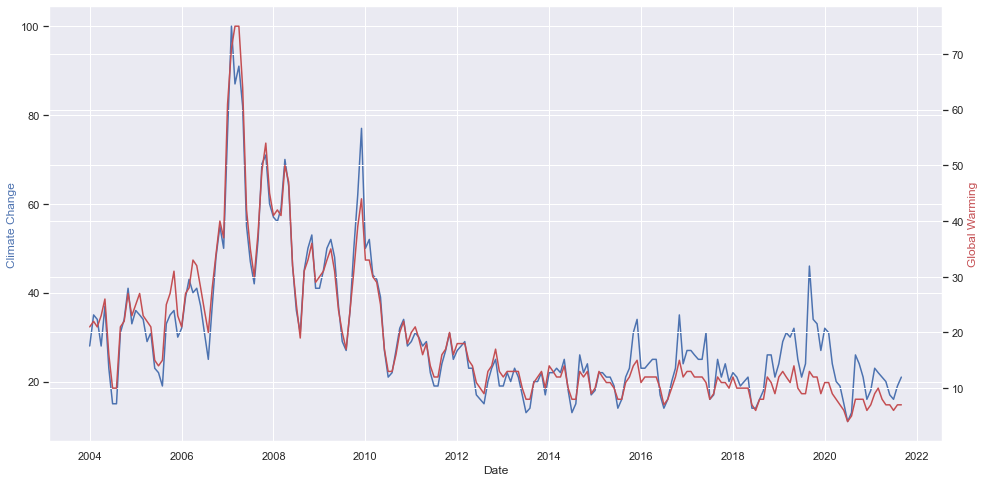

In [98]:
fig,ax = plt.subplots(sharey=True)
ax = sns.lineplot(data=df, x='Month', y = 'Climate change: (Worldwide)', color='b')
ax.set_ylabel('Climate Change', color='b')
ax.set(xlabel='Date')
ax.set_xticklabels('year')

ax2 = ax.twinx()
ax2 = sns.lineplot(data = df, x='Month', y = 'Global Warming: (Worldwide)', color='r')
ax2.set_ylabel('Global Warming', color='r')
plt.show()

TypeError: set_ticklabels() keywords must be strings

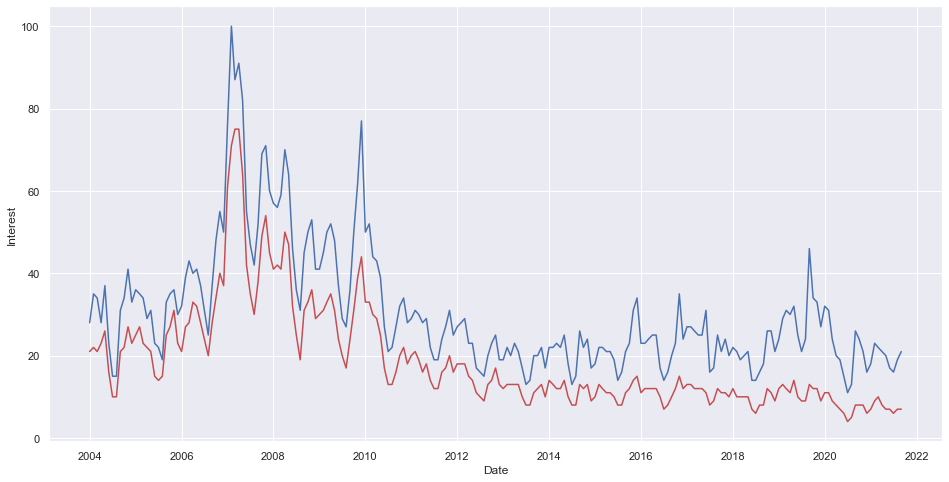

In [115]:
fig,ax = plt.subplots()
ax = sns.lineplot(data=df, x='Month', y = 'Climate change: (Worldwide)', color='b')
ax = sns.lineplot(data = df, x='Month', y = 'Global Warming: (Worldwide)', color='r')


ax.set_ylabel('Interest')
ax.set_xlabel('Date')
ax.set_xticklabels('',df['year'])

plt.show()

We could see that there is a clear trend in Google search about global warming or climate change. Usually, the Google search goes down around June - July - August every year. Also, there was a visible high interest from winter of 2006 to summer of 2010 which was an interesting discovery as well.

Text(0.5, 0, 'Date')

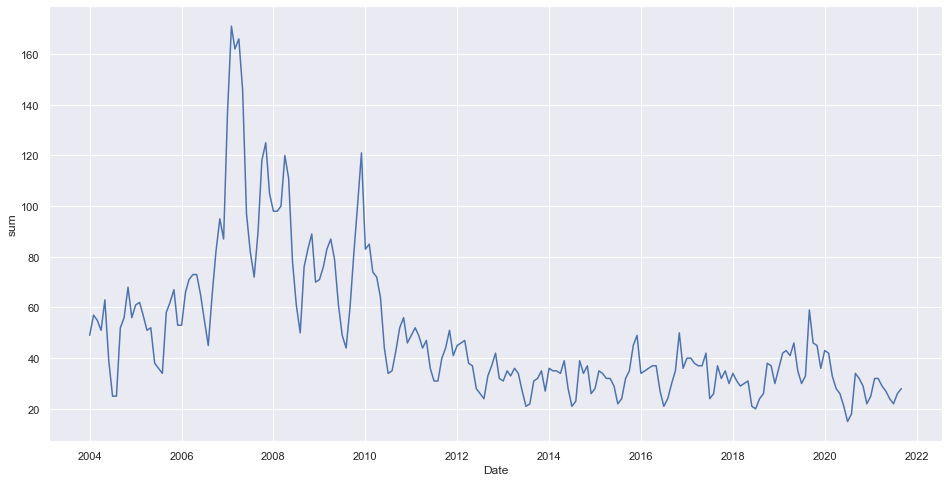

In [119]:
g=sns.lineplot(data=df, x='Month',y='sum')
g.set_xlabel('Date')

### Interest by City or Region

In [2]:
city = pd.read_csv('Breakdown_City.csv') #Interest percentage per city

In [3]:
city.head()

City Climate change: (1/1/04 - 9/27/21)  \
0       Manila                                64%   
1       Makati                                65%   
2    Cebu City                                67%   
3  Quezon City                                70%   
4     Pretoria                                66%   

  Global Warming: (1/1/04 - 9/27/21)  
0                                36%  
1                                35%  
2                                33%  
3                                30%  
4                                34%

In [146]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     72 non-null     object
 1   Climate  72 non-null     int64 
 2   Global   72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [4]:
city.rename(columns={'Climate change: (1/1/04 - 9/27/21)':'Climate', 
                     'Global Warming: (1/1/04 - 9/27/21)':'Global'}, inplace=True)

In [5]:
city.Climate=city.Climate.str.strip('%').astype('int')

In [6]:
city.Global=city.Global.str.strip('%').astype('int')

In [7]:
city.head()

City  Climate  Global
0       Manila       64      36
1       Makati       65      35
2    Cebu City       67      33
3  Quezon City       70      30
4     Pretoria       66      34

In [8]:
city.sum = city.Climate + city.Global

In [9]:
city.sum.unique()

array([100])

In [26]:
region = pd.read_csv('Breakdown_Region.csv') #Interest percentage by region

In [27]:
region.head()

Country Climate change: (1/1/04 - 9/27/21)  \
0          Kiribati                               100%   
1  Marshall Islands                                84%   
2        Micronesia                               100%   
3   Solomon Islands                                82%   
4           Vanuatu                                86%   

  Global Warming: (1/1/04 - 9/27/21)  
0                                NaN  
1                                16%  
2                                NaN  
3                                18%  
4                                14%

In [28]:
region.rename(columns={'Climate change: (1/1/04 - 9/27/21)':'Climate', 
                     'Global Warming: (1/1/04 - 9/27/21)':'Global'}, inplace=True)

In [29]:
region.head()

Country Climate Global
0          Kiribati    100%    NaN
1  Marshall Islands     84%    16%
2        Micronesia    100%    NaN
3   Solomon Islands     82%    18%
4           Vanuatu     86%    14%

In [31]:
region.Climate = region.Climate.str.strip('%')

In [34]:
region.Climate.replace(np.nan, 0, inplace=True)

In [36]:
region.Climate.astype('int')

0      100
1       84
2      100
3       82
4       86
      ... 
245      0
246      0
247      0
248      0
249      0
Name: Climate, Length: 250, dtype: int64

In [37]:
region.Global = region.Global.str.strip('%')
region.Global.replace(np.nan, 0, inplace=True)
region.Global.astype('int')

0       0
1      16
2       0
3      18
4      14
       ..
245     0
246     0
247     0
248     0
249     0
Name: Global, Length: 250, dtype: int64

In [39]:
region.Climate = region.Climate.astype('int')
region.Global = region.Global.astype('int')

In [41]:
region.head()

Country  Climate  Global
0          Kiribati      100       0
1  Marshall Islands       84      16
2        Micronesia      100       0
3   Solomon Islands       82      18
4           Vanuatu       86      14

In [42]:
region.sum = region.Climate + region.Global

In [43]:
region.sum.unique()

array([100,   0])

In [44]:
region[region.sum==0]
#These are the regions where there seems to be no interest in climate change or global warming
#Or there is no Google available in these regions?

Country  Climate  Global
212                              Antarctica        0       0
213                                  Tuvalu        0       0
214                                   Nauru        0       0
215                          Norfolk Island        0       0
216                            Cook Islands        0       0
217          British Indian Ocean Territory        0       0
218                    Svalbard & Jan Mayen        0       0
219       Falkland Islands (Islas Malvinas)        0       0
220                                Anguilla        0       0
221                              Seychelles        0       0
222                  British Virgin Islands        0       0
223                               Gibraltar        0       0
224                              Montserrat        0       0
225                                  Monaco        0       0
226                     São Tomé & Príncipe        0       0
227                              St. Martin        0       0
228                           Liechtenstein        0       0
229                              Cape Verde        0       0
230                          St. Barthélemy        0       0
231                           Åland Islands        0       0
232                                 Andorra        0       0
233                              San Marino        0       0
234             French Southern Territories        0       0
235                           Bouvet Island        0       0
236                Central African Republic        0       0
237                 Cocos (Keeling) Islands        0       0
238                        Christmas Island        0       0
239                           Guinea-Bissau        0       0
240                Heard & McDonald Islands        0       0
241                                    Niue        0       0
242                        Pitcairn Islands        0       0
243                             North Korea        0       0
244  South Georgia & South Sandwich Islands        0       0
245                   St. Pierre & Miquelon        0       0
246                                 Tokelau        0       0
247                   U.S. Outlying Islands        0       0
248                            Vatican City        0       0
249                         Wallis & Futuna        0       0

I can represent these findings in a world graph where Climate change as blue, Gloabl warming as red, half as white, no interest as black.

### Drawing World Map

In [135]:
import geopandas as gpd

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon

In [141]:
geopy.geocoders.options.default_user_agent = "my-application"

NameError: name 'geopy' is not defined

In [143]:
geolocator = Nominatim(user_agent="abc",timeout=2)

lat_lon = []
for c in city['City']: 
    try:
        location = geolocator.geocode(c)
        if location:
            print(location.latitude, location.longitude)
            lat_lon.append(location)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s")
lat_lon


14.5907332 120.9809674
14.5567949 121.0211226
10.3095549 123.8931107
14.6509905 121.0486155
-25.7459374 28.1879444
-26.205 28.049722
38.8949924 -77.0365581
-36.852095 174.7631803
43.5896231 -79.6443879
45.4211435 -75.6900574
-33.928992 18.417396
-34.9281805 138.5999312
28.6138954 77.2090057
45.5202471 -122.6741949
-33.8548157 151.2164539
-31.9527121 115.8604796
-37.8142176 144.9631608
49.2608724 -123.113952
-27.4689682 153.0234991
43.6534817 -79.3839347
53.535411 -113.507996
49.8955367 -97.1384584
47.6038321 -122.3300624
44.9772995 -93.2654692
37.3361905 -121.890583
-1.3031689499999999 36.826061224105075
24.4538352 54.3774014
39.7392364 -104.9848623
22.5414185 88.35769124388872
51.0460954 -114.065465
19.0759899 72.8773928
42.3602534 -71.0582912
32.7174202 -117.1627728
22.5736296 88.3251045
40.7127281 -74.0060152
37.7790262 -122.419906
1.357107 103.8194992
39.9622601 -83.0007065
30.2711286 -97.7436995
39.9527237 -75.1635262
34.0536909 -118.242766
52.4796992 -1.9026911
33.4484367 -112.07

[Location(Manila, Capital District, Metro Manila, Philippines, (14.5907332, 120.9809674, 0.0)),
 Location(Makati, Southern Manila District, Metro Manila, Philippines, (14.5567949, 121.0211226, 0.0)),
 Location(Cebu City, Central Visayas, Philippines, (10.3095549, 123.8931107, 0.0)),
 Location(Quezon City, Eastern Manila District, Metro Manila, Philippines, (14.6509905, 121.0486155, 0.0)),
 Location(Pretoria, City of Tshwane Metropolitan Municipality, Gauteng, 0126, South Africa, (-25.7459374, 28.1879444, 0.0)),
 Location(Johannesburg, City of Johannesburg Metropolitan Municipality, Gauteng, 2001, South Africa, (-26.205, 28.049722, 0.0)),
 Location(Washington, District of Columbia, United States, (38.8949924, -77.0365581, 0.0)),
 Location(Auckland, Waitematā, Auckland, 1010, New Zealand / Aotearoa, (-36.852095, 174.7631803, 0.0)),
 Location(Mississauga, Peel Region, Golden Horseshoe, Ontario, Canada, (43.5896231, -79.6443879, 0.0)),
 Location(Ottawa, (Old) Ottawa, Ottawa, Eastern Ontari

In [144]:
df_city = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])

In [145]:
df_city

City Name  \
0   Manila, Capital District, Metro Manila, Philip...   
1   Makati, Southern Manila District, Metro Manila...   
2             Cebu City, Central Visayas, Philippines   
3   Quezon City, Eastern Manila District, Metro Ma...   
4   Pretoria, City of Tshwane Metropolitan Municip...   
..                                                ...   
67                Amsterdam, Noord-Holland, Nederland   
68           Daerah Khusus Ibukota Jakarta, Indonesia   
69                           กรุงเทพมหานคร, ประเทศไทย   
70        Paris, France métropolitaine, 75044, France   
71  Madrid, Área metropolitana de Madrid y Corredo...   

                  Coordinates  
0   (14.5907332, 120.9809674)  
1   (14.5567949, 121.0211226)  
2   (10.3095549, 123.8931107)  
3   (14.6509905, 121.0486155)  
4   (-25.7459374, 28.1879444)  
..                        ...  
67    (52.3727598, 4.8936041)  
68   (-6.1753942, 106.827183)  
69  (13.8245796, 100.6224463)  
70    (48.8566969, 2.3514616)  
71   (40.4167047, -3.7035825)  

[72 rows x 2 columns]

In [147]:
geometry = [Point(x[1], x[0]) for x in df_city['Coordinates']]

In [148]:

crs = {'init': 'epsg:4326'}

## convert df to geo df
geo_df = gpd.GeoDataFrame(df_city, crs=crs, geometry=geometry)
geo_df.head()

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


City Name  \
0  Manila, Capital District, Metro Manila, Philip...   
1  Makati, Southern Manila District, Metro Manila...   
2            Cebu City, Central Visayas, Philippines   
3  Quezon City, Eastern Manila District, Metro Ma...   
4  Pretoria, City of Tshwane Metropolitan Municip...   

                 Coordinates                    geometry  
0  (14.5907332, 120.9809674)  POINT (120.98097 14.59073)  
1  (14.5567949, 121.0211226)  POINT (121.02112 14.55679)  
2  (10.3095549, 123.8931107)  POINT (123.89311 10.30955)  
3  (14.6509905, 121.0486155)  POINT (121.04862 14.65099)  
4  (-25.7459374, 28.1879444)  POINT (28.18794 -25.74594)

In [165]:
geo_df['climate'] = city['Climate']

In [166]:
geo_df.head()

City Name  \
0  Manila, Capital District, Metro Manila, Philip...   
1  Makati, Southern Manila District, Metro Manila...   
2            Cebu City, Central Visayas, Philippines   
3  Quezon City, Eastern Manila District, Metro Ma...   
4  Pretoria, City of Tshwane Metropolitan Municip...   

                 Coordinates                    geometry  climate  
0  (14.5907332, 120.9809674)  POINT (120.98097 14.59073)       64  
1  (14.5567949, 121.0211226)  POINT (121.02112 14.55679)       65  
2  (10.3095549, 123.8931107)  POINT (123.89311 10.30955)       67  
3  (14.6509905, 121.0486155)  POINT (121.04862 14.65099)       70  
4  (-25.7459374, 28.1879444)  POINT (28.18794 -25.74594)       66

In [153]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

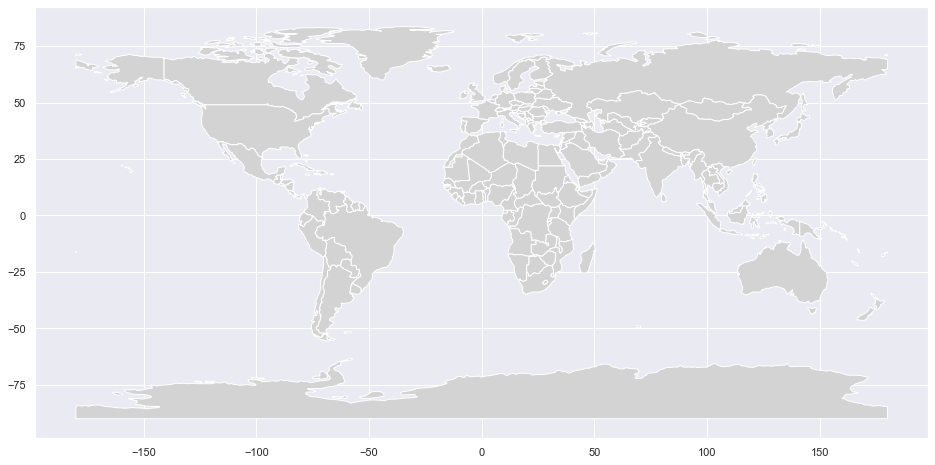

In [155]:
countries_map = countries.plot(color="lightgrey")

In [172]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:363: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


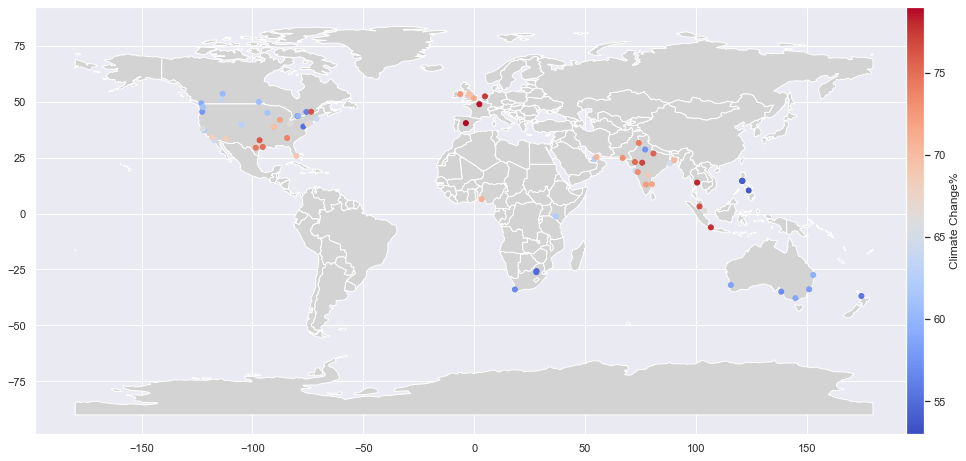

In [179]:
f, ax = plt.subplots(figsize=(16,16))
countries.plot(color='lightgrey', ax=ax)
geo_df['geometry'].plot(ax=ax, markersize = 100, 
                        c=geo_df['climate'],colormap='coolwarm', marker = '.')

norm = mpl.colors.Normalize(vmin=geo_df['climate'].min(), vmax=geo_df['climate'].max())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.15)
mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.coolwarm, norm=norm, label="Climate Change%")

Above is a world map of cities with Climate Change Google search interest percentage. Perhaps this with temperature change data can make a nice graphic about awareness about Climate change vs the actual temperature differences.